In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('archive/preprocessed_data.csv')

In [3]:
df.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
3,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,1,0,0,0,0,0,1
4,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,1,0,0,0,0,1,0,0,0


In [4]:
df = df.dropna()
df.isnull().sum()

Winner                  0
title_bout              0
B_avg_KD                0
B_avg_opp_KD            0
B_avg_SIG_STR_pct       0
                       ..
R_Stance_Open Stance    0
R_Stance_Orthodox       0
R_Stance_Sideways       0
R_Stance_Southpaw       0
R_Stance_Switch         0
Length: 160, dtype: int64

In [5]:
df['Winner'].value_counts()

Red     3979
Blue    1923
Name: Winner, dtype: int64

In [6]:
df['title_fight'] = [1 if tb == 'True' else 0 for tb in df['title_bout']]
df['isRedWin'] = [1 if Winner == 'Red' else 0 for Winner in df['Winner']]

In [7]:
df.drop('Winner', axis=1, inplace=True)
df.drop('title_bout', axis=1, inplace=True)

In [8]:
df.head()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch,title_fight,isRedWin
0,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,0.00,0.0,...,0,0,0,0,1,0,0,0,0,1
1,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,0.00,0.0,...,0,0,0,0,1,0,0,0,0,1
2,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,0.00,0.0,...,0,0,0,0,0,0,1,0,0,1
3,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,0.00,0.0,...,0,1,0,0,0,0,0,1,0,0
4,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,0.25,0.0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('isRedWin',axis=1)
y = df['isRedWin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [10]:
X_train.shape, X_test.shape

((4721, 159), (1181, 159))

In [11]:
X_train.head()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch,title_fight
2488,0.533203,0.132812,0.434922,0.255137,0.395820,0.145625,1.738281,0.062500,0.5625,0.09375,...,1,0,0,0,0,1,0,0,0,0
258,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.0000,0.00000,...,1,0,0,0,0,1,0,0,0,0
2259,0.000000,0.000000,0.420000,0.560000,0.750000,0.000000,3.000000,2.000000,0.0000,0.00000,...,1,0,0,0,0,1,0,0,0,0
3295,0.531250,0.000000,0.550312,0.212188,0.232187,0.250000,0.375000,0.375000,0.0000,0.03125,...,0,0,1,0,0,1,0,0,0,0
4491,0.578125,1.015625,0.435312,0.374844,0.093750,0.023438,1.250000,0.000000,0.0000,0.03125,...,0,0,1,0,0,0,0,1,0,0


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled[:3]

array([[ 0.98536068, -0.01524656, -0.16203831, -1.53122045,  0.48054524,
        -0.46162197,  2.03112931, -0.46696375,  1.42922447, -0.04746703,
         0.62142443,  0.95200448,  0.09820699, -0.4361934 ,  0.45010634,
         0.5524472 , -0.29119764, -0.92175419, -0.63760379, -0.51876986,
         0.74640971, -0.11007646,  0.23281175,  0.76066382,  0.1877288 ,
        -0.42352068,  1.67444117,  0.57740495,  0.11117591,  0.08870143,
         1.26815951,  1.18075844, -0.46434394, -0.58351768,  0.64974501,
         0.94831005,  0.1841293 , -0.11332712, -0.69895694, -0.56277822,
         0.10704044, -0.61251898,  0.83136751,  1.18133174, -0.2799775 ,
        -0.39554916, -0.40016345,  0.04244355,  0.09315742,  0.82930648,
         0.67017318,  1.3689758 , -0.59924694,  2.42887282,  1.96952815,
        -0.28223797,  0.        , -0.13049554,  1.50857713,  0.88749221,
         0.70440575,  2.07298666,  4.5568179 ,  0.17124671,  1.01765228,
        -0.42229037, -0.37152731, -0.43150936, -0.2

In [15]:
import tensorflow as tf
tf.random.set_seed(30)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [16]:
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [17]:
history = model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
148/148 [==============================] - 1s 1ms/step - loss: 0.7538 - accuracy: 0.6653 - precision: 0.6761 - recall: 0.9654
Epoch 2/10
148/148 [==============================] - 0s 1ms/step - loss: 0.6075 - accuracy: 0.6727 - precision: 0.6731 - recall: 0.9991
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.6732 - precision: 0.6732 - recall: 1.0000
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 0.5729 - accuracy: 0.6736 - precision: 0.6737 - recall: 0.9991
Epoch 5/10
148/148 [==============================] - 0s 1ms/step - loss: 0.5903 - accuracy: 0.6715 - precision: 0.6738 - recall: 0.9924
Epoch 6/10
148/148 [==============================] - 0s 1ms/step - loss: 0.5701 - accuracy: 0.6717 - precision: 0.6742 - recall: 0.9912
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 0.5869 - accuracy: 0.6727 - precision: 0.6731 - recall: 0.9991
Epoch 8/10
148/148 [=====================

In [18]:
pred = model.predict(X_test_scaled)

37/37 [==============================] - 0s 583us/step


In [19]:
pred

array([[0.5086182 ],
       [0.57025415],
       [0.5086182 ],
       ...,
       [0.97743964],
       [0.57025415],
       [0.57025415]], dtype=float32)

In [20]:
pred_classes = [1 if val > 0.5 else 0 for val in np.ravel(pred)]

In [22]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, pred_classes))

[[  0 380]
 [  0 801]]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test,pred_classes):.2f}')
print(f'Precision: {precision_score(y_test,pred_classes):.2f}')
print(f'Recall: {recall_score(y_test,pred_classes):.2f}')

Accuracy: 0.68
Precision: 0.68
Recall: 1.00


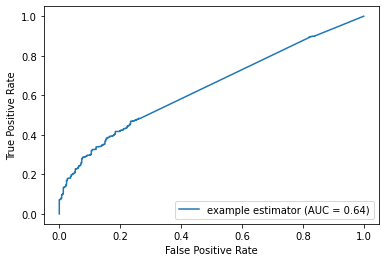

In [24]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

In [26]:
model.save('testmodel.h5')